# This is notebook for learn Linear Regression From scratch in python

Linear Regression stands as one of the simplest machine learning algorithms. In this article, we will delve into this algorithm and demonstrate its implementation in Python from scratch.

As the name implies, Linear Regression is well-suited for Regression problems. It operates as a Linear Model, signifying that we aim to establish a linear association between the input variables (X) and a single output variable (Y). 

When the input (X) consists of a single variable, this model is referred to as Simple Linear Regression. On the other hand, when there are multiple input variables (X), it is known as Multiple Linear Regression.

## Simple Linear Regression

Indeed, Linear Regression is considered a relatively straightforward model in the realm of machine learning. Specifically, Simple Linear Regression represents the simplest form of this model. It involves establishing a linear relationship between a single input variable (X) and a corresponding output variable (Y). 

This straightforward nature makes it an accessible and widely used algorithm for various regression tasks. However, it is essential to recognize that simplicity does not diminish its usefulness, as Linear Regression serves as a foundational model that forms the basis for more complex techniques and methodologies in the field of machine learning.

### Model Representation

In this particular situation, we are presented with an input variable labeled as X and a corresponding output variable referred to as Y. The objective is to establish a linear connection between these two variables. 

In this context, **X is recognized as the Independent Variable**, representing the variable that we can control or manipulate. On the other hand, **Y is identified as the Dependent Variable**, as its value relies on the value of the independent variable X.

We can express this linear relationship as follows:

Y = β0 + β1X

The coefficient β1 is often referred to as a scale factor or coefficient, while β0 is known as the bias coefficient. The bias coefficient adds an additional degree of freedom to this model. 

This equation bears resemblance to the line equation y = mx + b, where β1 (Slope) corresponds to m and β0 (Intercept) corresponds to b. In this Simple Linear Regression model, the aim is to draw a line between X and Y that approximates the relationship between the two variables.

However, the process of obtaining these coefficients remains a question. This procedure is known as the learning process, and there are various approaches to finding them. 

Two commonly used methods are the Ordinary **Least Square Method** and the **Gradient Descent** Approach. In this post, we will utilize the Ordinary Least Square Method for Simple Linear Regression and the Gradient Descent Approach for Multiple Linear Regression.

### Ordinary Least Square Method

In the previous section, we mentioned our intention to approximate the relationship between X and Y by representing it as a line. Suppose we have a set of input and output data points. 
When we plot these data points in a 2D space, the resulting graph will resemble the following image.

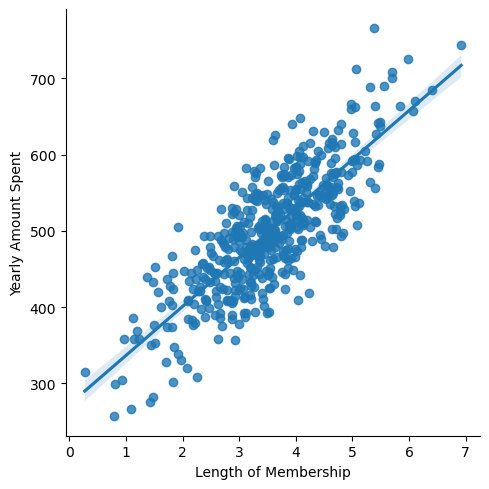

In [78]:
from IPython.display import Image, display
display(Image(filename='regression.png'))

In the image, you can observe a line, and that precisely represents our objective. Our goal is to minimize the error of our model, and a well-performing model will exhibit minimal error. 

To achieve this, we aim to find the line that minimizes the error by reducing the distance between each data point and the line. This relationship is visually depicted as shown below.

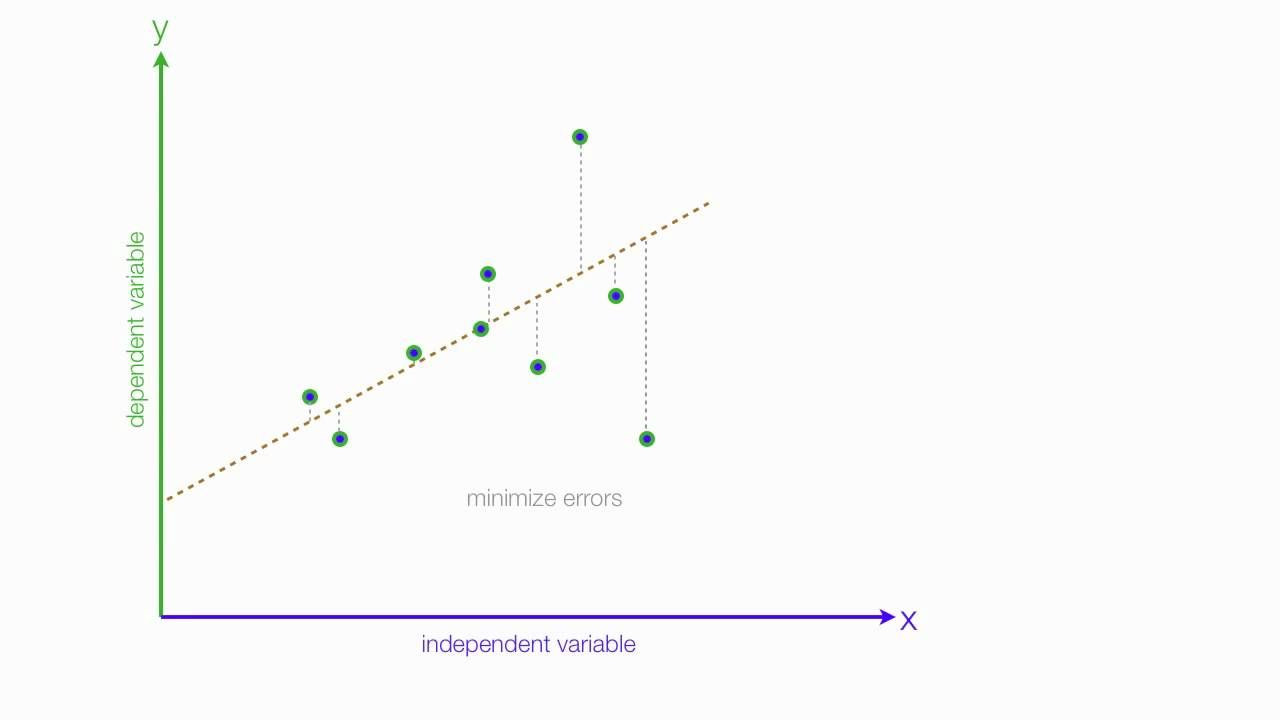

In [79]:
display(Image(filename='variable.jpeg'))

The total error of this model is the sum of the errors of each point, which can be represented as:

D = ∑ᵐi=1 (dᵢ)²

where,
m - Total number of points
dᵢ - Distance between the line and the ith point.

To minimize the error in the model, we square each distance since some points may lie above the line while others may lie below it. After minimizing D through mathematical calculations, we get the following equations:

β₁ = ∑ᵐi=1 ((xᵢ - x̄) * (yᵢ - ȳ)) / ∑ᵐi=1 ((xᵢ - x̄)²)

β₀ = ȳ - β₁ * x̄

Here, x̄ represents the mean value of the input variable X, and ȳ represents the mean value of the output variable Y.

Now we have the model, which is known as the Ordinary Least Square Method. We will proceed to implement this model in Python using the obtained equations.

Y = β₀ + β₁X

#### Implementation

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
df = pd.read_csv('./Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [83]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [84]:
X = df['Length of Membership']
y = df['Yearly Amount Spent']

In [85]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(y)

# Total number of values
m = len(X)

print('mean X: ', mean_x)
print('mean y: ', mean_y)
print('toal number of values: ', m)

mean X:  3.5334615559150566
mean y:  499.31403825859053
toal number of values:  500


In [86]:
# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)

64.21868431558434 272.39978605802804


Successfully calculated the coefficients for your linear model:

Y = 272.39978605802804 + 64.21868431558434 * X

Where:
Y represents Yearly Amount Spent,

X represents Length of Membership.

This equation forms the basis of your linear model.

Now, let's visualize the linear model graphically to gain a better understanding of how it fits the data points. Graphical representation often helps in interpreting and assessing the model's performance.

In [87]:
import seaborn as sns

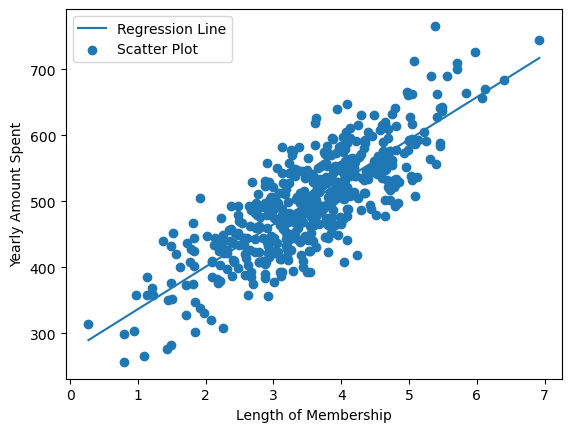

In [99]:
# Plotting Values and Regression Line

max_x = np.max(X) 
min_x = np.min(X)

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y_formula = b0 + b1 * x

# Ploting Line
plt.plot(x, y_formula, label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, y, label='Scatter Plot')

plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.legend()
plt.show()

Various techniques exist for evaluating models, and in this case, we will utilize two specific metrics: Root Mean Squared Error (RMSE) and Coefficient of Determination (R² Score).

RMSE represents the square root of the sum of all errors divided by the number of values, expressed mathematically as:

RMSE = √(∑ᵐi=1 (1/m) * (ŷᵢ - yᵢ)²)

Where:
m - Total number of values
ŷᵢ - Predicted output value for the ith data point
yᵢ - Actual output value for the ith data point

By calculating the RMSE, we can assess the average difference between the predicted values and the actual values, providing valuable insight into the model's performance. Now, let's proceed with computing the RMSE for our linear model to evaluate its accuracy.

In [101]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

46.56615419934396


Now we will find  R^2 score. SSt is the total sum of squares and SSt is the total sum of squares of residuals. R^2 Score usually range from 0 to 1. It will also become negative if the model is completely wrong. Now we will find R^2 Score.

In [103]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (y[i] - mean_y) ** 2
    ss_r += (y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6546162204082381


0.65 is not so bad. Now we have implemented Simple Linear Regression Model using Ordinary Least Square Method. Lets see how this model using Library scikit learn

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((-1, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, y)

print(np.sqrt(mse))
print(r2_score)

46.566154199343956
0.6546162204082382


You can see that this **exactly equal to model we built from scratch**, but simpler and less code.

Now we will move on to Multiple Linear Regression.

## Multiple Linear Regression
Multiple Linear Regression belongs to the category of Linear Regression, but it differs from Simple Linear Regression in that it deals with scenarios where the input contains multiple features (variables) instead of just one.

### Model Representation
Similar to Simple Linear Regression, Multiple Linear Regression involves an input variable (X) and an output variable (Y). However, in this case, the input variable has "n" features, making it a model representation with multiple variables. Thus, we can represent the linear model as:

Y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ

Where "xᵢ" represents the ith feature in the input variable. By introducing a constant term "x₀ = 1" and expressing the equation in matrix form, it becomes:

Y = βᵀX

Where:
β = [β₀, β₁, β₂, ..., βₙ]ᵀ (transpose of the coefficient vector)
X = [1, x₁, x₂, ..., xₙ]ᵀ (transpose of the feature vector)

To evaluate the performance of the model, we define a cost function, which essentially measures the error in our model. The hypothesis function "h_β(x)" represents our approximation, 

h_β(x) = βᵀ x

Where:
h_β(x) is the prediction made by the model for the input features x,
β is the coefficient vector (containing the model's parameters),
x is the feature vector (containing the input features).

and the cost function "J(β)" is defined as:

J(β) = (1 / 2m) * ∑ᵐi=1 (h_β(x^(i)) - y^(i))²

Where:
m is the number of data points
h_β(x^(i)) is the prediction of the model for the ith data point
y^(i) is the actual output value for the ith data point

By minimizing this cost function, we can find the optimal values for the coefficients β. For this purpose, we use the Gradient Descent optimization algorithm.

The main goal is to iteratively update the values of β to minimize the cost function and achieve the best fit for the model to the data. Gradient Descent is a commonly used method for this optimization process, allowing us to fine-tune the coefficients and create an effective Multiple Linear Regression model.

#### Gradient Descent

Gradient Descent is a method for optimizing a cost function. In our case, we will utilize the Gradient Descent Algorithm to optimize the cost function for our model.
Step 1:
We start the optimization process by initializing the values of coefficients β₀, β₁, ..., βₙ with some initial value, which in this case is set to 0.

Step 2:
Next, we iteratively update the coefficient values using the Gradient Descent Algorithm. This involves the following steps:

1. Calculate the gradients (∂J(β)/∂βⱼ) of the cost function J(β) with respect to each coefficient βⱼ.
2. Update each coefficient βⱼ by subtracting the product of the learning rate α and the corresponding gradient (∂J(β)/∂βⱼ) from its current value.

The process is repeated until it converges, which means that the coefficient values stabilize, and the cost function reaches a minimum value.

Here, the learning rate α controls the step size of the updates. It prevents drastic changes to the coefficient values, ensuring that the optimization process moves smoothly towards the minimum of the cost function. The gradient (∂J(β)/∂βⱼ) indicates the direction in which the cost function decreases, guiding the updates to reach the optimal coefficient values.

By carefully adjusting the learning rate and iteratively updating the coefficients, we can effectively optimize the cost function and obtain the best possible fit for our Multiple Linear Regression model.


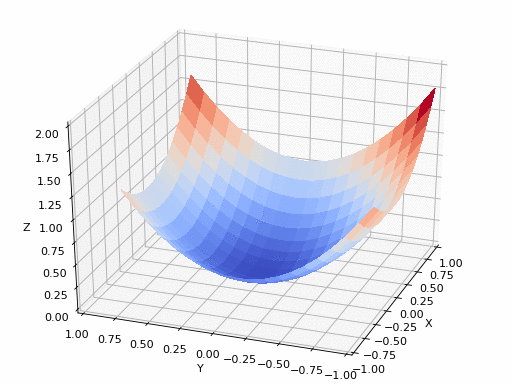

In [115]:
display(Image(filename="gradient descent.gif"))

The animation provided above illustrates the Gradient Descent method. However, we still need to determine the value of the gradient (∂J(β)/∂βⱼ) before proceeding with the calculations. After applying the necessary mathematics, Step 2 is transformed into:

βⱼ := βⱼ - α * (1/m) * Σᵢ (h_β(x^(i)) - y^(i)) * xⱼ^(i)

In this updated equation, we iteratively update the values of the coefficients βⱼ according to the above expression. This specific method is known as Batch Gradient Descent.

Through Batch Gradient Descent, we can efficiently adjust the coefficients of our Multiple Linear Regression model, progressively improving its performance and finding the optimal values that minimize the cost function.

##### Implementation